In [82]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/crop_yield_visualization.csv")
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'State vs Yield')

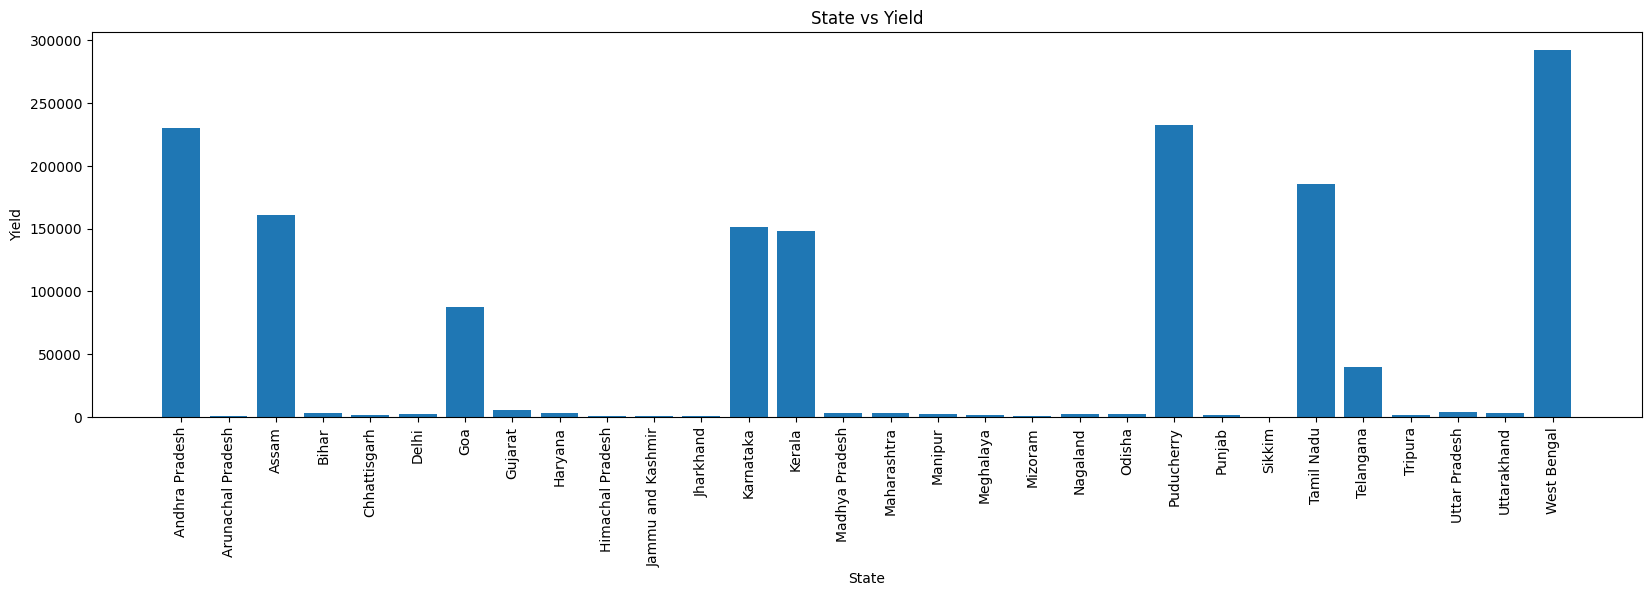

In [91]:
# 1) state vs yeild
df_state=df.groupby('State')['Yield'].sum()
df_state
plt.figure(figsize=(20,5))
plt.bar(df_state.index,df_state.values)
# plt.bar(df['State'],df['Yield'])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Yield")
plt.title("State vs Yield")


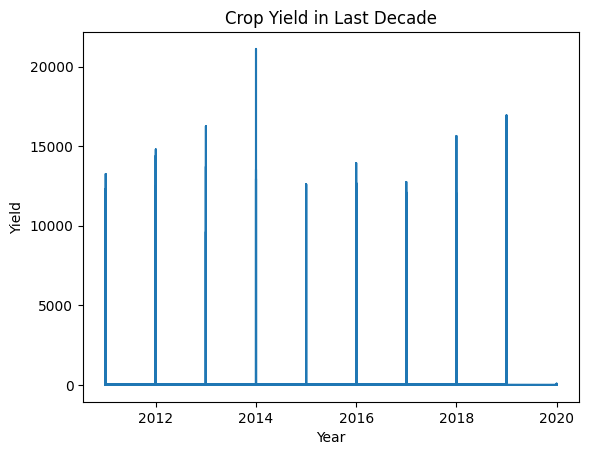

In [85]:
# 2) yeild in last decade
df_lastdecade = df[df['Crop_Year'] > 2010]
plt.plot(df_lastdecade['Crop_Year'], df_lastdecade['Yield'])
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Crop Yield in Last Decade')
plt.show()

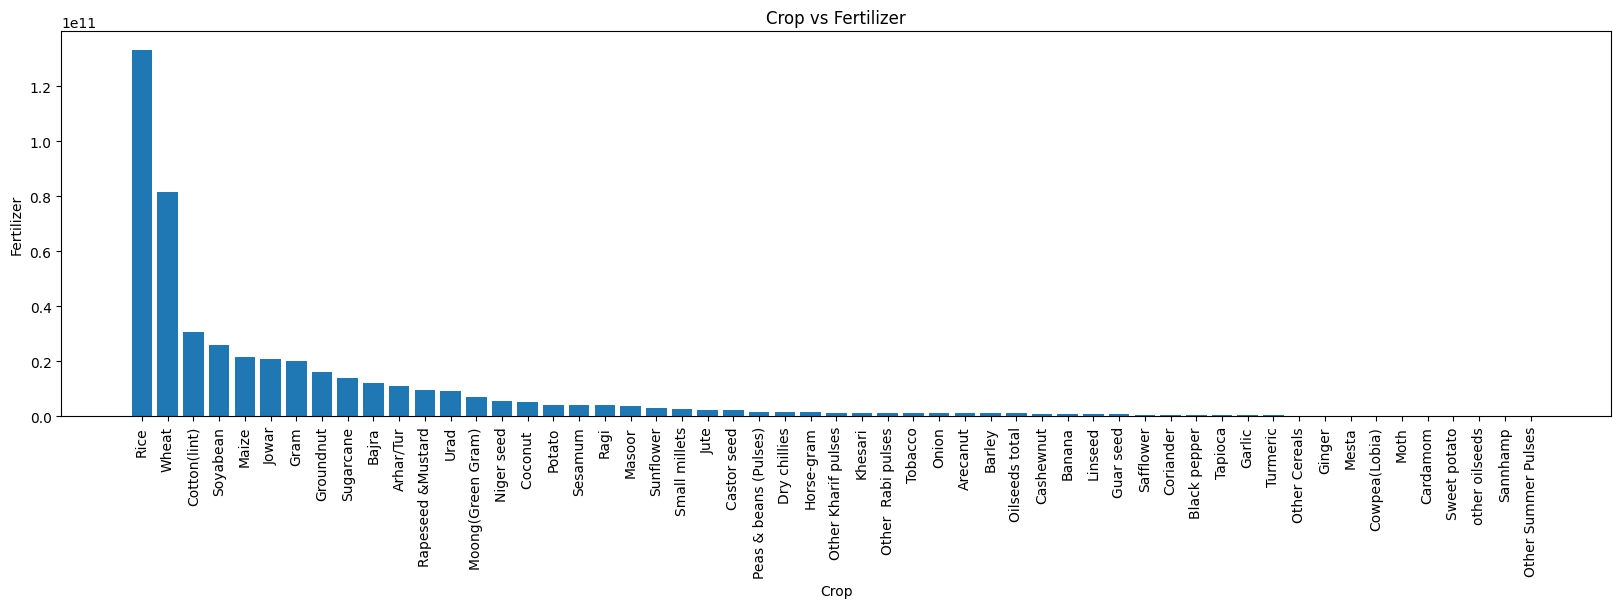

In [121]:
# 3) crop vs fertilizer
df_crop_fert=df.groupby('Crop')['Fertilizer'].sum().sort_values(ascending=False)
df_crop_fert
plt.figure(figsize=(20,5))
plt.bar(df_crop_fert.index,df_crop_fert.values)
plt.xticks(rotation=90)
plt.xlabel("Crop")
plt.ylabel("Fertilizer")
plt.title("Crop vs Fertilizer")
plt.show()

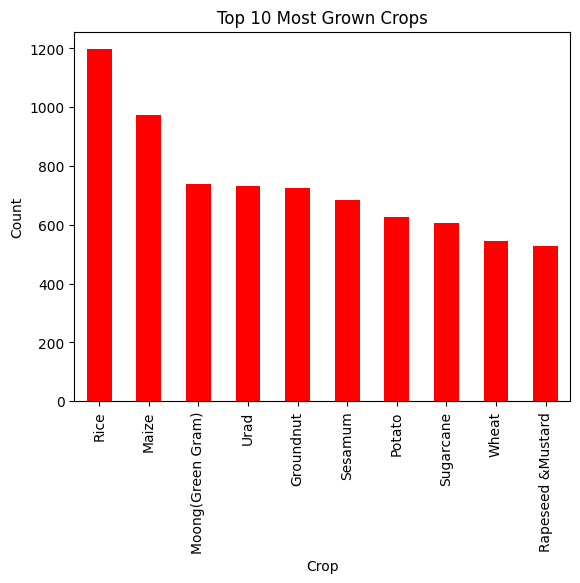

In [87]:
# 4) top 10 most grown crops
df_most_grown=df['Crop'].value_counts().head(10)
df_most_grown
df_most_grown.plot(kind='bar',color='red')
plt.xlabel("Crop")
plt.ylabel("Count")
plt.title("Top 10 Most Grown Crops")
plt.show()

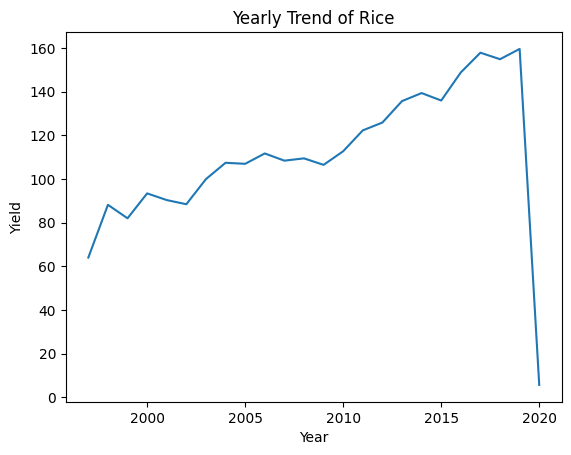

In [122]:
# 5) yearly trend of Rice(most grown crop in india)
df_rice=df[df['Crop']=='Rice']
df_rice.groupby('Crop_Year')['Yield'].sum()
plt.plot(df_rice.groupby("Crop_Year")['Yield'].sum())
#plt.bar(df_rice.groupby("Crop_Year")['Yield'].sum().index,df_rice.groupby("Crop_Year")['Yield'].sum().values)
plt.xlabel("Year")
plt.ylabel("Yield")
plt.title("Yearly Trend of Rice")
plt.show()

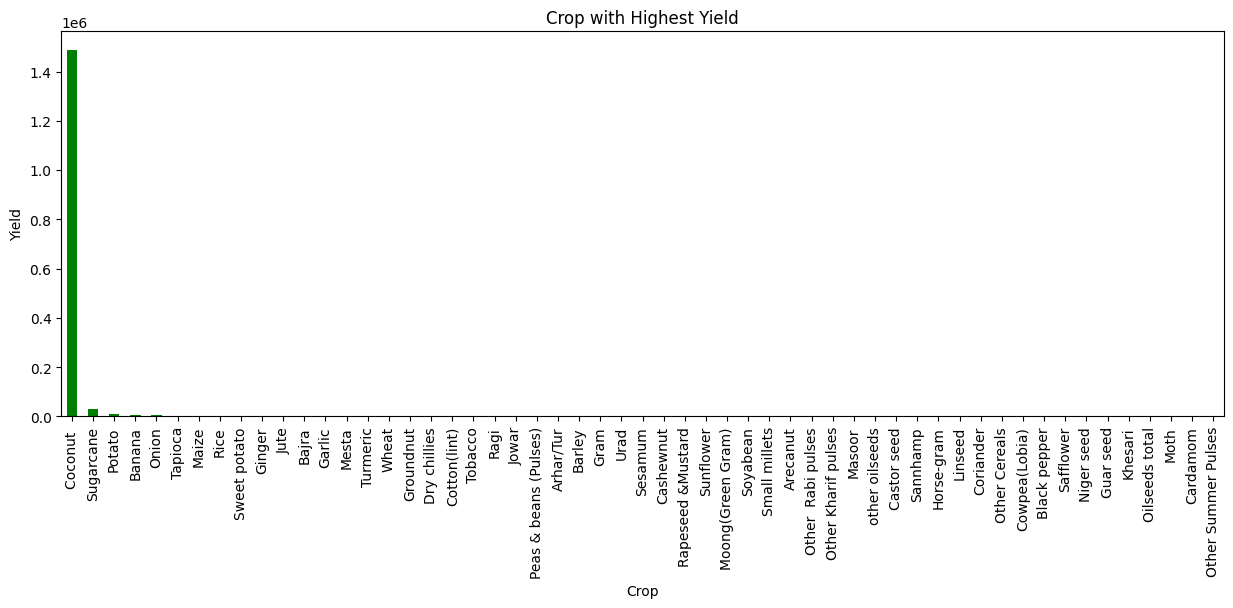

In [116]:
# 6) crop with highest yield
df_high_yield=df.groupby('Crop')['Yield'].sum().sort_values(ascending=False)
df_high_yield.head(10)
plt.figure(figsize=(15,5))
df_high_yield.plot(kind='bar',color='green')
plt.xlabel("Crop")
plt.ylabel("Yield")
plt.title("Crop with Highest Yield")
plt.show()


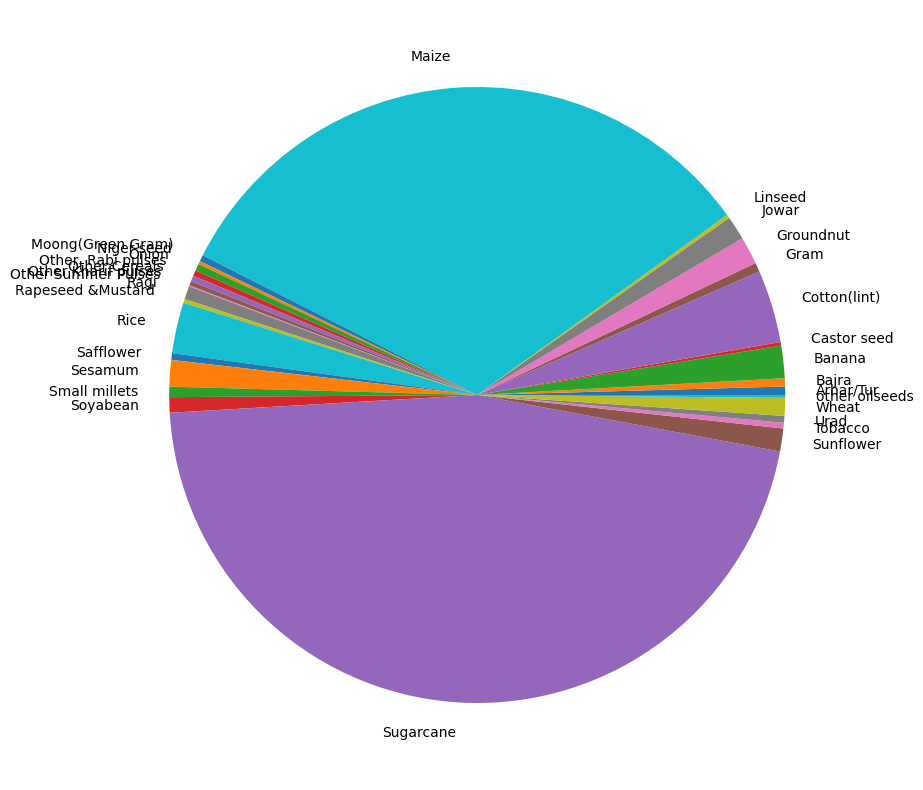

In [90]:
#distribution of crops in Maharshtra
df_maha=df[df['State']=="Maharashtra"]
df_maha.groupby('Crop')['Yield'].sum()
plt.figure(figsize=(20,10))
plt.pie(df_maha.groupby('Crop')['Yield'].sum(),labels=df_maha.groupby('Crop')['Yield'].sum().index)
plt.show()